# Classification of Raw Point Clouds using Deep Learning & generating 3D Building Models.

- 🔬 Data Science
- 🥠 Deep Learning <i>(PointCNN model)</i>
- 🌍 GIS
- ☁️ Point Cloud Classification

<p align="center">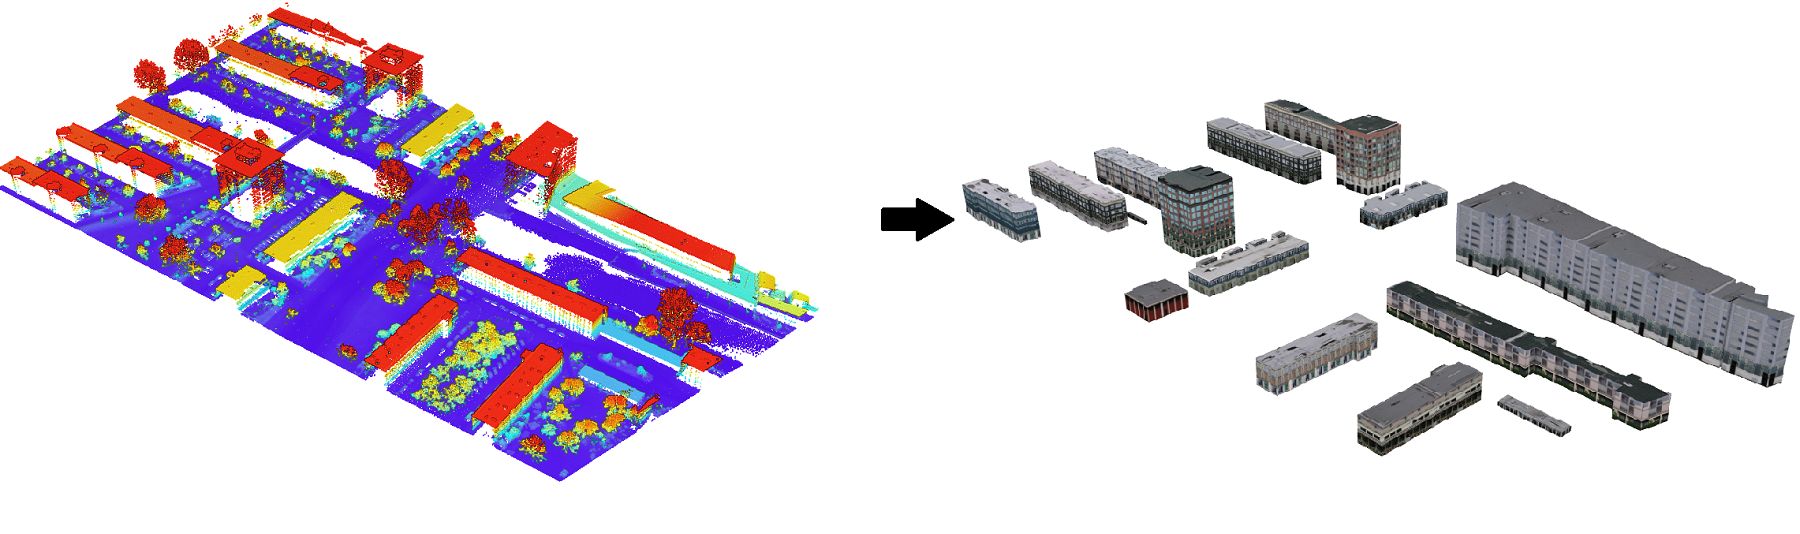</p>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Data-Used-&amp;-Area-of-Interest" data-toc-modified-id="Data-Used-&amp;-Area-of-Interest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Used &amp; Area of Interest</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Methodology</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Deep-Learning-Section" data-toc-modified-id="Deep-Learning-Section-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Deep Learning Section</a></span><ul class="toc-item"><li><span><a href="#Initiation" data-toc-modified-id="Initiation-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Initiation</a></span></li><li><span><a href="#Exporting-the-Data" data-toc-modified-id="Exporting-the-Data-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Exporting the Data</a></span></li><li><span><a href="#Preparing-the-Data-for-Model-Training" data-toc-modified-id="Preparing-the-Data-for-Model-Training-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Preparing the Data for Model Training</a></span></li><li><span><a href="#Visualization-of-Prepared-Data" data-toc-modified-id="Visualization-of-Prepared-Data-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Visualization of Prepared Data</a></span></li><li><span><a href="#Training-the-Model" data-toc-modified-id="Training-the-Model-5.2.5"><span class="toc-item-num">5.2.5&nbsp;&nbsp;</span>Training the Model</a></span></li><li><span><a href="#Visualization-of-Results" data-toc-modified-id="Visualization-of-Results-5.2.6"><span class="toc-item-num">5.2.6&nbsp;&nbsp;</span>Visualization of Results</a></span></li><li><span><a href="#Saving-the-Trained-Model" data-toc-modified-id="Saving-the-Trained-Model-5.2.7"><span class="toc-item-num">5.2.7&nbsp;&nbsp;</span>Saving the Trained Model</a></span></li><li><span><a href="#Classifcation-using-Trained-Model" data-toc-modified-id="Classifcation-using-Trained-Model-5.2.8"><span class="toc-item-num">5.2.8&nbsp;&nbsp;</span>Classifcation using Trained Model</a></span></li></ul></li><li><span><a href="#GIS-Section-(ArcGIS-Pro)" data-toc-modified-id="GIS-Section-(ArcGIS-Pro)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>GIS Section (ArcGIS Pro)</a></span></li><li><span><a href="#GIS-Section-(City-Engine)" data-toc-modified-id="GIS-Section-(City-Engine)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>GIS Section (City Engine)</a></span></li></ul></li><li><span><a href="#Results-&amp;-Discussion" data-toc-modified-id="Results-&amp;-Discussion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Results &amp; Discussion</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

Classification of point clouds has always been a challenging task, due to its naturally unordered data structure. The workflow described in this sample is about going from raw unclassified point clouds to digital twins: near-perfect representation of real-world entities. Within the scope of this sample, we are only interested in 'digital twins of buildings' (3D building multipatches/models), but this work can also be used for guidance, in other relevant use-cases for various objects of interest.

We can further divide this sample's workflow, based on what technology or set of tools are used. First, is the 'deep learning' portion of the workflow where 'ArcGIS API for Python' is used, and second is the 'GIS' portion, where features of 'ArcGIS Pro' & 'City Engine' are utilized.

Further details on the PointCNN implementation in the API (working principle, architecture, best practices, etc.), can be found <a href="https://developers.arcgis.com/python/guide/point-cloud-segmentation-using-pointcnn" target="_blank">here</a>, along with instructions on how to set up the Python environment. Additional sample notebooks related to PointCNN can be found <a href="https://developers.arcgis.com/python/sample-notebooks/" target="_blank">here</a>.

Before proceeding through this notebook, it is advised to go through the API Reference for PointCNN (`export_point_dataset()`, `prepare_data()`, `Transform3d()`, & `PointCNN()`), that can be found <a href="http://developers.arcgis.com/python/api-reference/arcgis.learn.html" target="_blank">here</a>. It will help in understanding the PointCNN's workflow in detail.

## Objectives

<ol style="list-style-type:upper-roman">
<li>Classify building points using API's PointCNN Model, where we train it for two classes; viz. 'Buildings' & 'Everything else'.</li>
<br>
<li>Generate 3D building multipatches, from classified building points using 'ArcGIS Pro' & 'City Engine'.</li>
</ol>

## Data Used & Area of Interest

Any airborne point cloud dataset & area of interest can be used. But for this sample, <a href="https://downloads.pdok.nl/ahn3-downloadpage/" target="_blank"> AHN3 dataset</a>, provided by the Government of The Netherlands is considered, which is one of the highest quality open dataset available currently, in terms of accurate labels & point density. While the area of interest for this work is 'Amsterdam' & its nearby regions. Its unique terrain with canals & from modern to 17<sup>th</sup>-century architecture style makes it a good candidate for a sample.

## Methodology

### Preprocessing

- Uncompress, the downloaded AHN3 dataset's `.laz` files, into `.las` format.


- Reassign classcodes, so that only two classes remain in the data: ‘buildings’ & ‘Everything else’. In this sample, classcode '0' is used to represent 'building', & classcode '1' is used to represent 'Everything else'.


- Split all the `.las` files into three unique sets, one for training, one for validation, and one for testing. There is no fixed rule, but generally, the validation data for point cloud in `.las` format should be at least 1 % (by size) of the total data available, with appropriate diversity within the validation dataset.

### Deep Learning Section

#### Initiation

In [ ]:
from arcgis.learn import export_point_dataset, prepare_data, PointCNN

#### Exporting the Data

In this step, `.las` files are converted to 'HDF5 binary data format'. The function `export_point_dataset()` is used for this.

Apart from that, the folder structure for the 'data_path' argument must contain two folders, 'train' & 'val', which should have the training and validation files, respectively. <i> (As shown in figure 1.)</i>

<p align="center">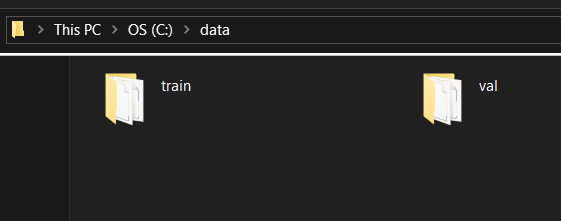</p>

**<center>Figure 1</center>**



The `export_point_dataset()` function only needs an 'input folder' path and an 'output folder' path. The rest of the arguments have an appropriate default value, which should be valid in most cases. Here, 'extra_features' is used to include additional attributes from LiDAR data, like intensity, number of returns, etc. In this sample X, Y, Z, & Intensity are used. After the export is completed at the provided 'output path', the folder structure of exported data will also contain two folders with converted HDF files. <i> (As shown in figure 2.)</i> 

<p align="center">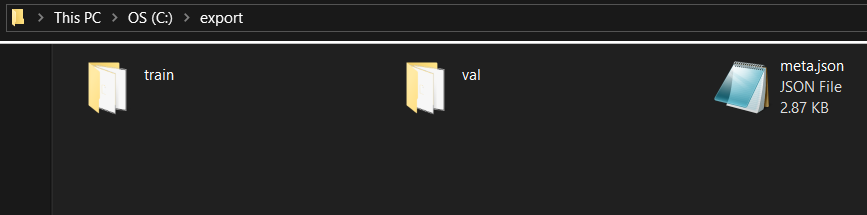</p>

**<center>Figure 2</center>**

In [ ]:
path = 'data'
output_path = 'export'

In [ ]:
export_point_dataset(path, output_path, 
                     extra_features=[('intensity', 5000, 0)])

Export finished.


#### Preparing the Data for Model Training

For `prepare_data()`, deciding the value of 'batch_size' depends on the available RAM or VRAM depending upon whether CPU or GPU is being used. And `transforms` can be used for introducing rotation, jitter, etc in the dataset. `data.classes` can be used to verify what classes will the model be learning about.

In [ ]:
colormap = {'0':[255,0,0], '1':[0,0,0]}

In [ ]:
data = prepare_data(output_path, dataset_type='PointCloud', batch_size=2, transforms=None, color_mapping=colormap)

In [ ]:
data.classes

[0, 1]

Alternatively, this notebook can be tried live. The following steps will download a sample 'exported data' and pass it to `prepare_data()` as described above :

In [ ]:
import os, zipfile
from pathlib import Path
from arcgis.gis import GIS
gis = GIS('home')

<Item title:"classification_of_raw_point_clouds_using_deep learning_&_generating_3d_building_models" type:Image Collection owner:api_data_owner>
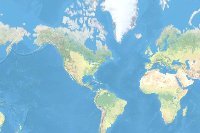

In [ ]:
training_data = gis.content.get('a138ca788ea148b282c70a83d609994a')
training_data

In [ ]:
filepath = training_data.download(file_name=training_data.name)

In [ ]:
with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [ ]:
output_path = Path(os.path.join(filepath.split('.')[0]))

Common steps:

In [ ]:
colormap = {'0':[255,0,0], '1':[0,0,0]}

In [ ]:
data = prepare_data(output_path, dataset_type='PointCloud', batch_size=2, transforms=None, color_mapping=colormap)

In [ ]:
data.classes

#### Visualization of Prepared Data

`show_batch()` helps in visualizing the exported data.

In [ ]:
data.show_batch(rows=1)

<p align="center"><img src="../../static/img/pointcnn_sample1_show_b.gif" /></p>

**<center>Figure 3</center>**

#### Training the Model

First, the PointCNN model object is created, utilizing the prepared data.

In [ ]:
pcnn = PointCNN(data)

Next, `lr_find()` function is used to find the optimal learning rate. It controls the rate at which existing information will be overwritten by newly acquired information throughout the training process. If no value is specified, the optimal learning rate will be extracted from the learning curve during the training process.

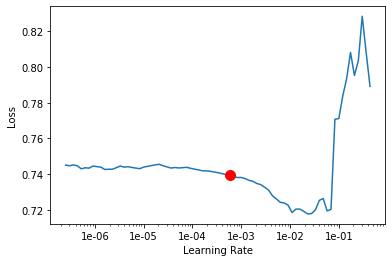

0.0005754399373371565

In [ ]:
pcnn.lr_find()

`fit()` is used to train the model, where a new 'optimum learning rate' is automatically computed or the previously computed optimum learning rate can be passed. (Any other user-defined learning rate can also be passed.)

If 'early_stopping' is True, then the model training will stop when the model is no longer improving, regardless of the ‘Max Epochs’ parameter value specified. This is the default. While, an 'epoch' means the dataset will be passed forward and backward through the neural network one time, and 'Iters_per_epoch' controls that Instead of complete data, a subset of data is passed per epoch.


In [ ]:
pcnn.fit(10, 0.0005754399373371565, early_stopping=True)

epoch,train_loss,valid_loss,accuracy,time
0,0.332195,0.237140,0.924130,1:52:08
1,0.235514,0.145923,0.954341,1:45:18
2,0.212749,0.143809,0.954955,1:43:04
3,0.171458,0.178612,0.931577,1:43:16
4,0.175261,0.163094,0.944441,3:38:45
5,0.141523,0.163715,0.952164,1:49:48
6,0.110648,0.201771,0.955076,1:44:03


Epoch 7: early stopping


#### Visualization of Results

`show_results()` is used to visualize the results of the model, for the same scene with the ground truth. `compute_precision_recall()` can be used to generate per-class performance metrics, which is calculated based on the validation dataset.

In [ ]:
pcnn.show_results(rows=1)

<p align="center"><img src="../../static/img/pointcnn_sample1_show_r.gif" /></p>

**<center>Figure 4</center>**

#### Saving the Trained Model

The last step, related to training is saving the model using `save()`. Here apart from model files, performance metrics, a graph of validation and training losses, sample results, etc. are also saved. <i> (As shown in figure 5.)</i>

<p align="center">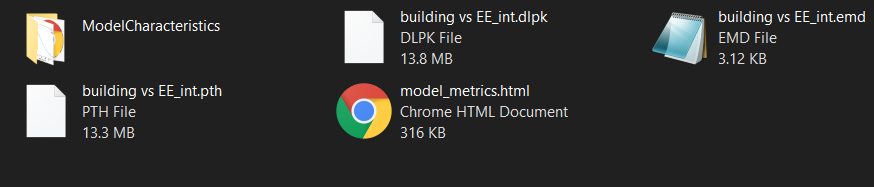</p>

**<center>Figure 5</center>**

In [ ]:
pcnn.save('building vs EE_int')

WindowsPath('sample/models/building vs EE_int')

#### Classifcation using Trained Model

For classification of point clouds using the trained model, `predict_las()` is used. It only requires 'input path' & 'output path'. With additional options for remapping of classcodes & selective classification.

In [ ]:
pcnn.predict_las(r'input', r'output_pred')

WindowsPath('output_pred')

### GIS Section (ArcGIS Pro)

There can be multiple unsupervised/semi-supervised workflows to clean the noise & generate building footprints from classified building points. The method used for this work is described below: 

We start from PointCNN's classified building points <i> (As shown in figure 6.)</i>. 

<p align="center">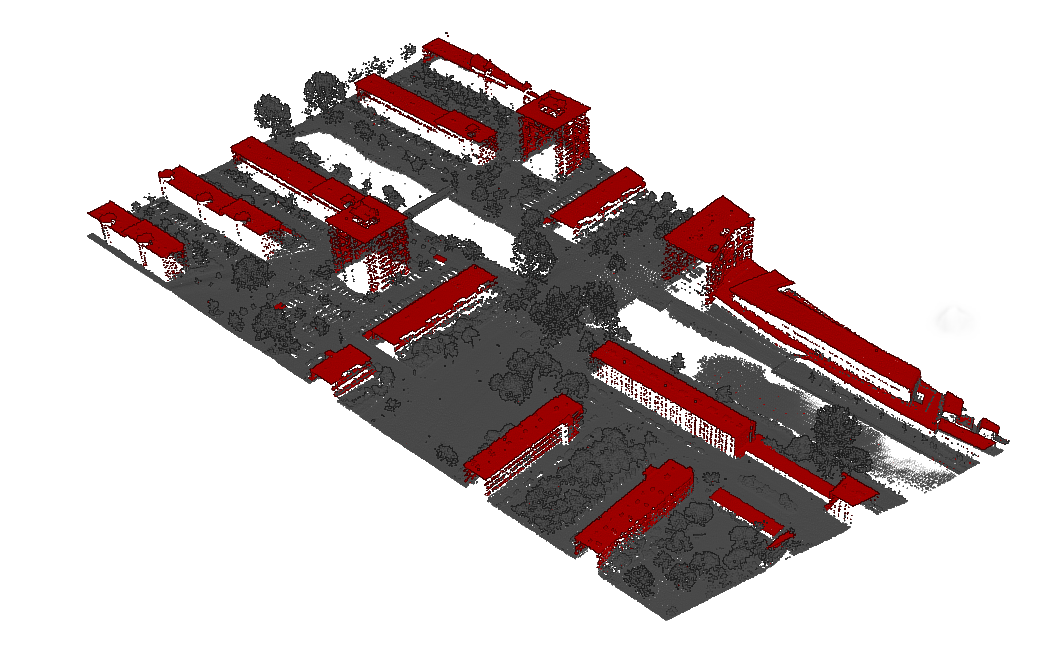</p>

**<center>Figure 6</center>**



Then using multiple GP tools in ArcGIS Pro, we clean the noise and we find the building footprints. These footprints are later used to generate multipatches. <i> (As shown in figure 7.)</i>


<p align="center">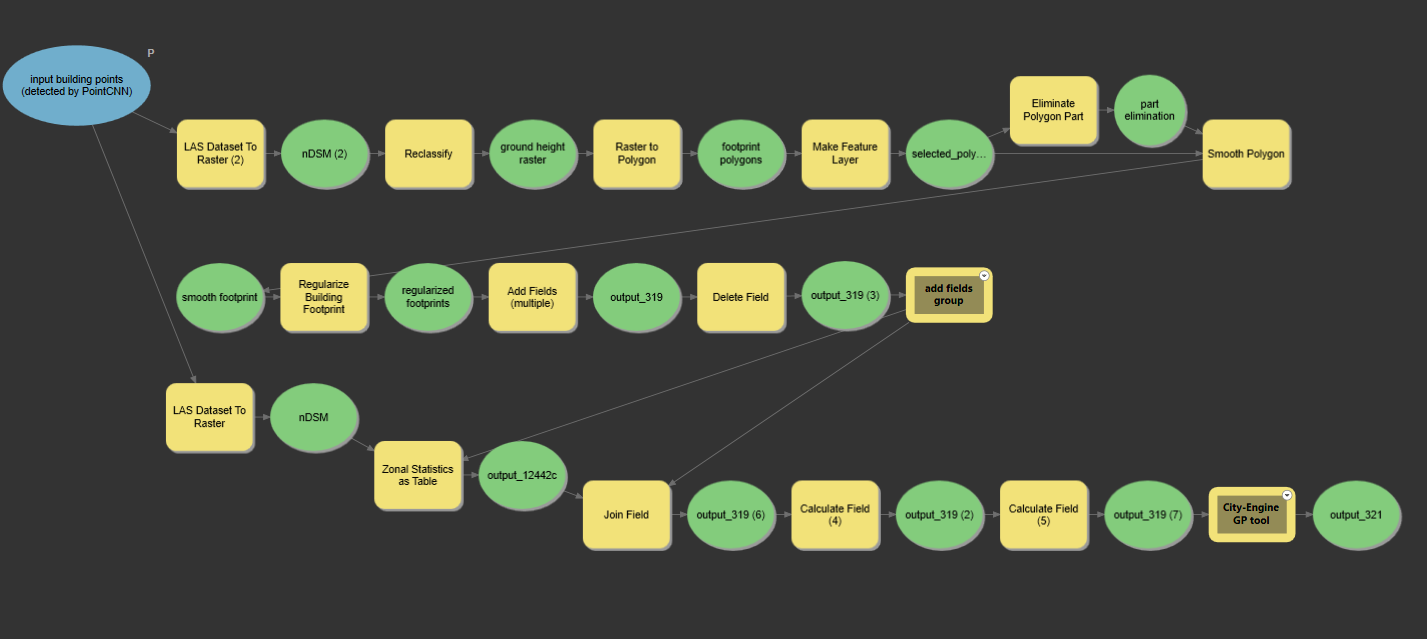</p>

**<center>Figure 7</center>**



In this post-processing pipeline, important prior information is that no building will have a very small area. This information is used to apply 'area-based thresholding' using <a href="https://pro.arcgis.com/en/pro-app/help/mapping/navigation/select-features-using-attributes.htm" target="_blank">Select by Attribute</a> and reduce the noise polygons generated from noise points.


After smoothening & regularizing the polygons <i>(As shown in figure 8.)</i>,
<a href="https://pro.arcgis.com/en/pro-app/tool-reference/spatial-analyst/zonal-statistics.htm"  target="_blank">Zonal Statistics</a> is used to populate the footprint polygon's attribute table with 'avg. building height'. Later, other information like building type, no. of floors, etc are also added, which are later used by City Engine's rule package to generate better digital twins of buildings.

<p align="center">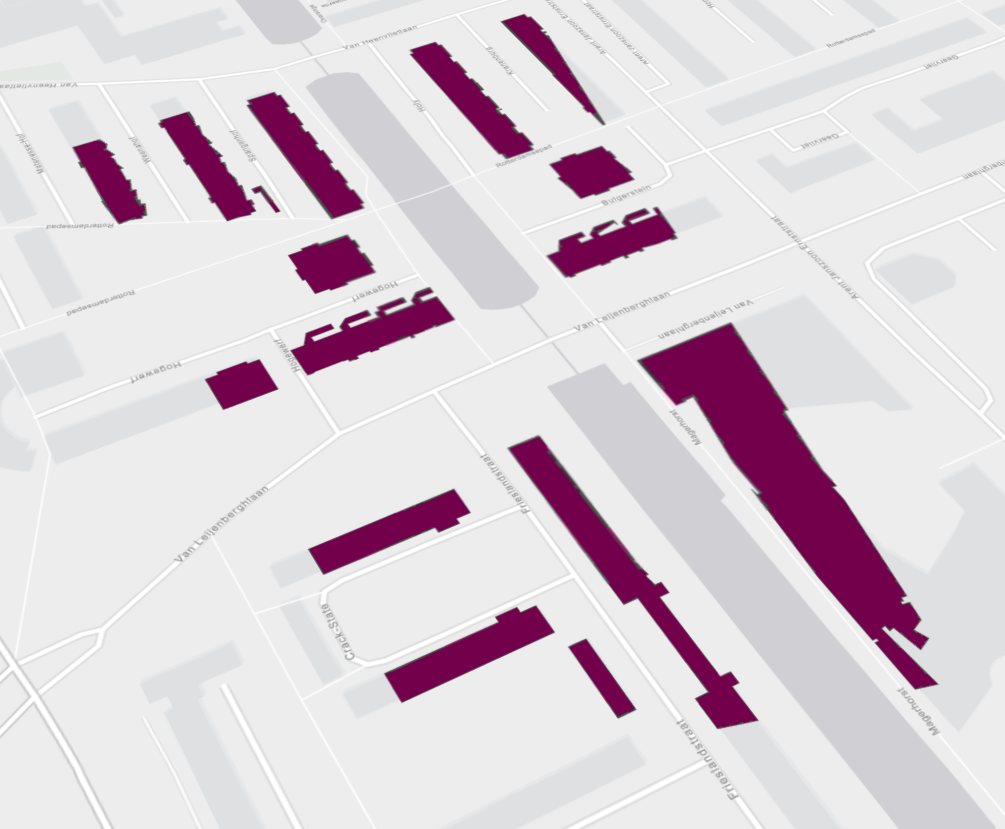</p>

**<center>Figure 8</center>**


    
    
    

### GIS Section (City Engine)

Lastly, these footprints are used to generate realistic 3D models/multipatches using City Engine's rule packages. Where <a href="https://pro.arcgis.com/en/pro-app/tool-reference/3d-analyst/features-from-cityengine-rules.htm" target="_blank">Features From CityEngine Rules</a> is used. The rule package itself is created using City Engine's  CGA rules, and the 'connection attributes' can be noted down from City Engine. <i> (As shown in figure 9.)</i>  

<p align="center">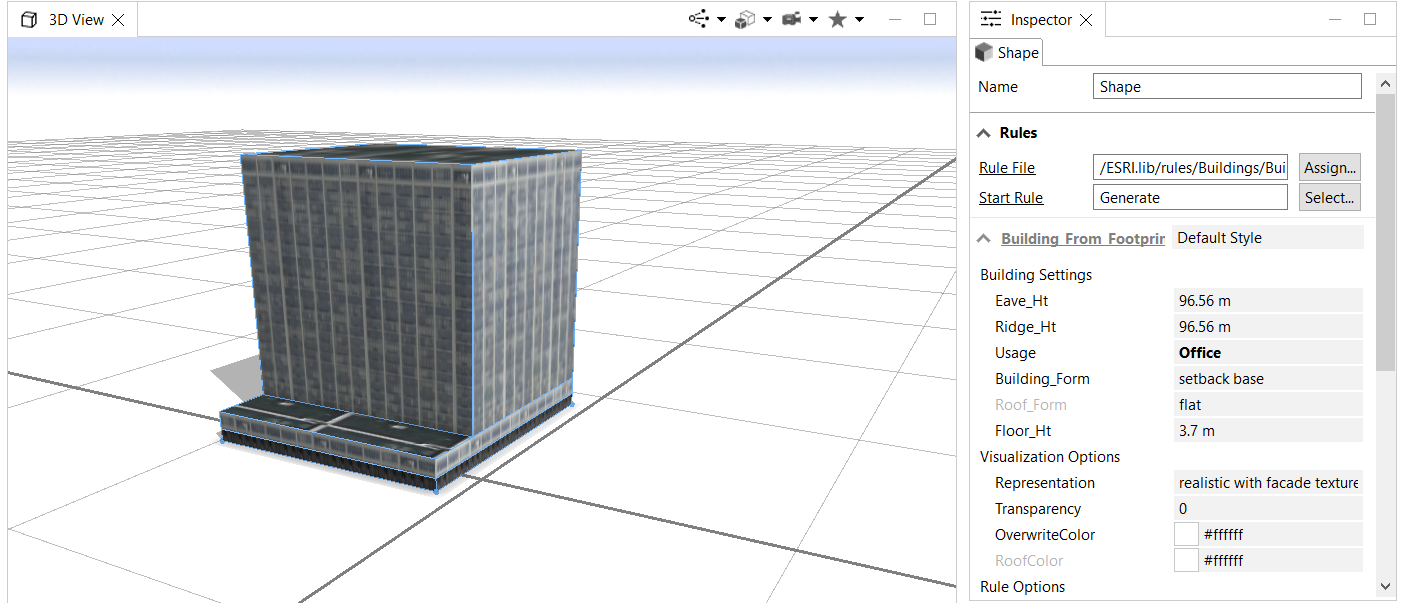</p>

**<center>Figure 9</center>**



## Results & Discussion

Building Multipatches are the final output of this sample. <i>(As shown in figure 10.) </i>

The output are very close to real world buildings from the 'area of interest', in terms of accurate depection & asthetics.


<p align="center">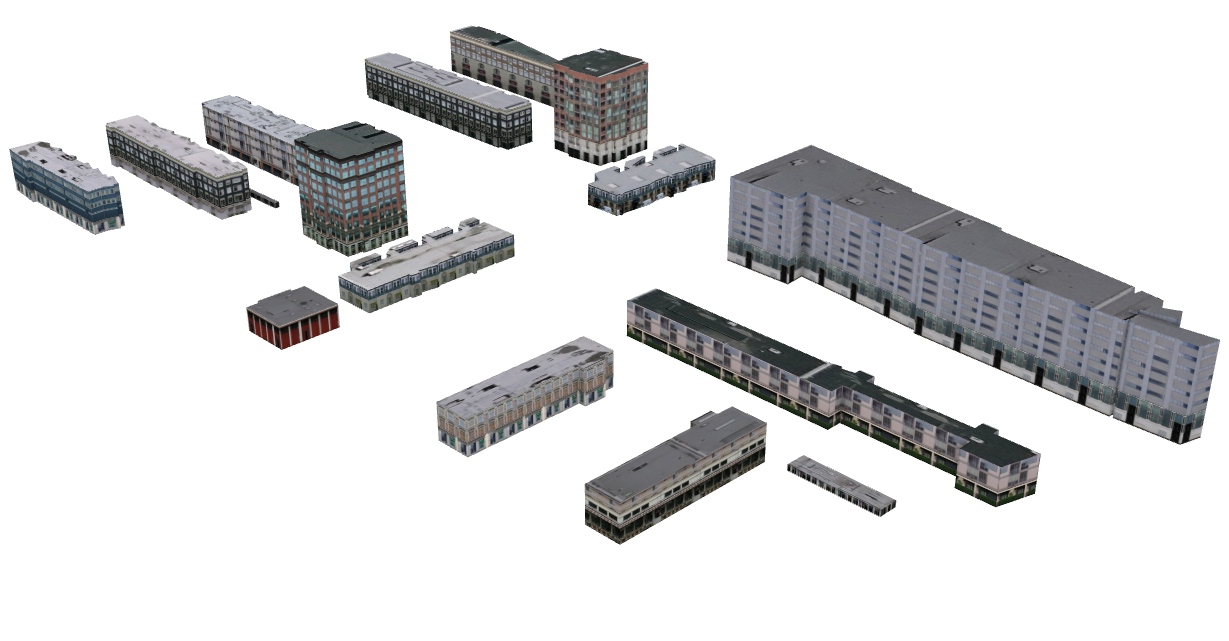</p>

**<center>Figure 10</center>**

## Conclusion

This notebook has summarized the end-to-end workflow for the training of a deep learning model for point cloud classification, along with utilizing the classified point clouds for generating digital twins of real world objects. Guidance can be taken from this sample for similar approaches where other objects are of interest like trees, traffic lights, wires etc.